# Project: Investigating  No-Show Appointments in Brazil in 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains details on medical appointments, characteristics of patients and whether they showed up for their appointments. It contains 110,527 rows of appointments and 14 columns explained below:   

### Data Dictionary

***Column Name | Data Type | Brief Description of the data***
1. *PatientID (int)* - Unique identifier for each patient
2. *AppointmentID (int)* - Unique identifier for each appointment
3. *Gender (str)* - Gender of the patient
4. *ScheduledDay (date)*- The date a patient booked the appointment
5. *ScheduledDayTime (dtime)*- The time a patient booked the appointment
6. *AppointmentDay (date)* - The date a patient is supposed to see a doctor
7. *Age (int)*- The age of the patient
8. *Neighborhood (str)* - Location/area near the hospital
9. *Scholarship (boolean)* - indicates whether patient is enrolled in govt welfare social program
10. *Hypertension (boolean)* - indicates whther patient has high blood pressure
11. *Diabetes (boolean)* -indicates whether patient is diabetic or not
12. *Alcoholism (boolean)* - Indicates whether patient is alcoholic or not
13. *SMS_received (boolean)* - indicates whether patient was notified of upcoming appointment
14. *No_show (str)* - indicates whether patient showed up to appointment 

    >NB: The dataset uses 0 and 1 to represent False and True respectively
    
### Questions to investigate
The goal of this project is to determine how the various characteristics of a patient may help determine whether they will show up to their medical appointment by examining the following questions:
1. what is the gender distribution of the patients?
2. What is the gender distribution of patients who showed up to their appointments?
3. Do patients with pre-existing medical conditions (hypertension) adhere to their appointments?
4. What are the average ages for patients based on their gender for the no-show categories?
5. Do medical appointment attendance rates improve as patients grow older?



In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%autosave 30

Autosaving every 30 seconds


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [73]:
#Load dataset from the CSV file.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

##### Let's get the general outlook of the dataframe

In [7]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


##### No. of rows and columns in the dataframe

In [74]:
'Rows: {}'.format(df.shape[0]), 'Columns: {}'.format(df.shape[1]) 

('Rows: 110527', 'Columns: 14')

In [75]:
#DataFrame DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




###### Checking for any duplicated entiries in the rows

In [10]:
'Number of dupicated rows in the dataset is: {}'.format(sum(df.duplicated()))

'Number of dupicated rows in the dataset is: 0'



######  We check for and Drop any rows with NULL/NaN entries

In [76]:
# Check for null values in every column 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64



> We can see that there are NO NULL entries in the various colmns in the dataset

##### Printing the dataset for visual inspection

In [77]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


###### Inspect column data types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

### Issues with the Data

#### 1. Column names
    1. Hipertension: Column name is misspelled as hipertension instead of hypertension
    2. No-show: column name has a hyphen separating the two words
    3. PatientId: Rename to PatientID to mantain uniformity with other columns with the word ID in them.
#### 2. Data Types
    1. PatientID: Convert DataType from float(represented as a scientific num) to a String object
    2. ScheduledDay: Clean and Convert DataType From String obj to datetime (Extract dates) and Extract TimeStamps <br> into a  separate column (ScheduledDayTime).
    3. AppointmentDay: Clean and Convert DataType From String obj to datetime (Extract dates)

### 1. Data Cleaning - Column Names



##### a. Renaming the PatientId column

In [78]:
df.rename(columns = {'PatientId': 'PatientID'}, inplace=True)

In [15]:
#Confirm changes
df.columns[0]

'PatientID'

##### b. Rename the Hipertension column

In [79]:
df.rename(columns = {'Hipertension': 'Hypertension'}, inplace=True)

Confirming that the changes we made have taken effect

In [251]:
'Hypertension' in df.columns

True

##### c) Rename the No-show column

In [80]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

In [252]:
#confirm the changes
'No_show' in df.columns

True

###### d) Confirm that column headers are clean

In [82]:
df.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### 2. Data Cleaning - Converting data to correct data types

#### a. Converting PatientID column from float to str

This will be useful incase we want to identify a patient's details. It is easier to identify PatientID **29872499824296** than it is in its current form **2.987250e+13**

In [83]:
# Column Details 
df['PatientID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: PatientID
Non-Null Count   Dtype  
--------------   -----  
110527 non-null  float64
dtypes: float64(1)
memory usage: 863.6 KB


In [93]:
#Convert the column into a String using a simple Lambda Function 
df['PatientID'] = df['PatientID'].apply(lambda x: str(x).split('.')[0])

We had to use the Split method because the result of the function str(x) is a string separated by a decimal i.e "29872499824296.0" We split the string returned by the function into two parts and then used indexing to pick the zero indexed part of the list. 



##### Confirming PatientID's new data Type

In [94]:
df['PatientID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: PatientID
Non-Null Count   Dtype 
--------------   ----- 
110527 non-null  object
dtypes: object(1)
memory usage: 863.6+ KB


Let's have a look at how the PatientID entries are represented in the dataFrame.

In [95]:
df.head(5)['PatientID']

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientID, dtype: object




#### b. Extracting Time from ScheduledDay string and creating a new column (ScheduledDayTime) to insert the new values

In [96]:
# 1. Split the scheduledDay string using T
# 2. USe slicing to obtain the 2nd section of the resulting list
# 3. Use slicing to pick all the indexes but exclude the last indexed item 

df['ScheduledDayTime'] = pd.to_datetime(df['ScheduledDay'].str.split('T').str[1].str[:-1],format='%H:%M:%S').dt.time

In [100]:
#Confirm creation of new column
'ScheduledDayTime' in df.columns

True



#### c. Extracting Date from ScheduledDay Column

In [101]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].str.split('T').str[0],format='%Y/%m/%d')

In [31]:
df['ScheduledDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

#### d. Extracting Time from AppointmentDay string to a new column AppointmentDayTime

In [103]:
df['AppointmentDayTime'] = pd.to_datetime(df['AppointmentDay'].str.split('T').str[1].str[:-1],format='%H:%M:%S').dt.time



Let's check for the counts of unique values in AppointmentDayTime

In [104]:
df.AppointmentDayTime.value_counts()

00:00:00    110527
Name: AppointmentDayTime, dtype: int64

As we can see **[00:00:00]** is the only unique timestamp value in our new column, which means that it will be of no use in our analysis.

In [105]:

#USE DROP method to delete the column from dataframe
df.drop(columns='AppointmentDayTime', inplace=True)

#### e. Extracting Date from AppointmentDate

In [107]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].str.split('T').str[0],format='%Y/%m/%d')

In [108]:
df['AppointmentDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]




##### Let's visualize our dataframe and confirm that it is clean and ready for analysis

In [109]:
df.head(2)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDayTime
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27


 Recheck for any duplicated entries that we may have introduced in the data wrangling stage

In [110]:

df.duplicated().sum()

0


Since everything looks in order, we will export and preserve our clean dataframe into a CSV file named *clean_noshowappointments_2016.csv*

In [111]:
df.to_csv('clean_noshowappointments_2016.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis




Load the clean dataset from clean_noshowappointments_2016.csv file

In [112]:
df_16 = pd.read_csv('clean_noshowappointments_2016.csv')

### Research Question 1. what is the gender distribution of the patients?

Let's get the count of individual patients from the data frame by counting the number of unique items in the PatientID column

No. of Patients

In [137]:
patients = df_16['PatientID'].nunique()

 No. of Female Patients

In [138]:
female = df_16[df_16['Gender'] == 'F']['PatientID'].nunique() 

No. of Male Patients

In [119]:
male = df_16[df_16['Gender'] == 'M']['PatientID'].nunique()

In [141]:
'The patient counts are as follows; Total: {},  Female: {}, Male: {}'.format(patients,female, male)

'The patient counts are as follows; Total: 62299,  Female: 40046, Male: 22253'

we will confirm that the calculated values are correct by comparing whether the sum of female and male patients is equal to the total count of unique patients

In [149]:
male + female == patients

True

Gender Percentage

In [147]:
'Female: {}%,  Male: {}%'.format(round((female/patients)*100), round((male/patients)*100))

'Female: 64%,  Male: 36%'



We are going to use a bar chart to visualize the comparison between the Female and Male gender 

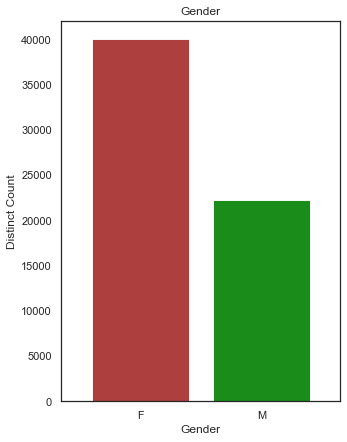

In [344]:
#use groupby to specificy column to group on
#Select the PatientID column
#count unique values using the nunique method
#use plot method to specify type of chart

df_16.groupby('Gender')['PatientID'].nunique().plot.bar(title='Gender',color=['brown','green'],rot=1,alpha=0.9,ylabel='Distinct Count',width=0.8, figsize=(5,7) );

As we can see from the bar graph, the number of Female patients (40,046) is higher than that of male patients (22,253)

### Research Question 2. What is the gender distribution of patients who showed up to their appointments?

In order to get the number of patients who attended their appointments, we are going to filter the data Frame to pick rows where the value for the 'No_show' column is **No**,  then,  we count the number of patients in the dataset according to their gender.

In [173]:
#filter data frame where column-NO-_show is No
#group the resulting data frame using gender
#select the [PatientID] column
#count the number of unique IDs

attended_appointment = df_16[df_16['No_show']=='No'].groupby('Gender')['PatientID'].nunique()

In [175]:
attended_appointment

Gender
F    34961
M    19193
Name: PatientID, dtype: int64

Let's visualize this data in a bar chart.

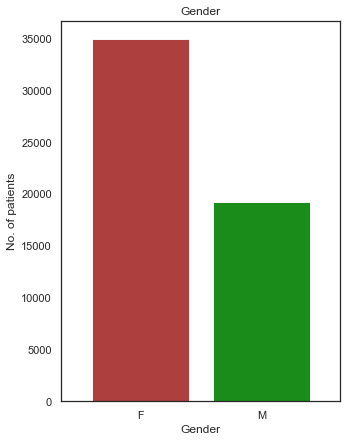

In [345]:
attended_appointment.plot(kind='bar',color=['brown','green'],alpha=0.9, width=0.8,title='Gender',figsize=(5,7), ylabel='No. of patients',rot=1 );

In [186]:
'The number of women({}) who attended their appointments is higher than that of men ({})'.format(attended_appointment.F, attended_appointment.M)

'The number of women(34961) who attended their appointments is higher than that of men (19193)'


### Research Question 3. Do patients with pre-existing medical conditions (hypertension)  adhere to their appointments compared to other patients?

In [185]:
df_16.head(1)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDayTime
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08


In order to determine the appointment attendance distribution of people with hypertension, we will group the df_16 dataframe, first,by whether the patient has hypertension then appointment attendance status. 

In [188]:
hyper_status = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()

In [199]:
hyper_status

Hypertension  No_show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: AppointmentID, dtype: int64

> **NB:** In the Hypertension column , 0 represents False meaning Patient has no hypertension, 1 represents True meaning Patient tested positive for hypertension


No. of patients with NO hypertension who ATTENDED their appointments can be retrived from the series object as shown below

In [207]:
#to access values from series obeject we will select 0 for the hypertension column and NO for the No_show column
no_hyper_attended_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[0]['No']


No. of patients with no hypertension who SKIPPED their appointments

In [206]:
"""
to access values for NO Hypertension Patients who Skipped appointment from series obeject 
we will select 0 for the hypertension column and YES for the No_show column
"""
no_hyper_skipped_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[0]['Yes']


Now that we have the attendance numbers for patients with NO hypertension, we can proceed to Calculating their attendance rate.
(attended/total*100)

In [208]:
#Patients without hypertension Appointment attendance rate
no_hyper_rate = round((no_hyper_attended_app / (no_hyper_attended_app + no_hyper_skipped_app)) *100)

In [209]:
"Patients without Hypertension have a {}% appointment attendance rate".format(no_hyper_rate)

'Patients without Hypertension have a 79% appointment attendance rate'

Let's examine attendance rate for Hypertension patients 

No of patients with hypertension attended their appointments


In [212]:
"""
to access values for patients wwith Hypertension who attended appointment from series object 
we will select 1 for the hypertension column and NO for the No_show column
"""
hyper_attended_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[1]['No']

In [213]:
"""
to access values for patients wwith Hypertension who SKIPPED appointment from series object 
we will select 1 for the hypertension column and YES for the No_show column
"""
hyper_skipped_app = df_16.groupby(['Hypertension', 'No_show'])['AppointmentID'].count()[1]['Yes']

To calculate the hypertension patients attendance rate we will simply divide the number of hypertension who showed up to their appointment by the total number of hypertension patients

In [214]:
hyper_rate = round(hyper_attended_app/(hyper_skipped_app+hyper_attended_app)*100)

In [185]:
"Patients WITH Hypertension have a {}% appointment attendance rate".format(hyper_rate)

'Patients WITH Hypertension have a 83% appointment attendance rate'

> *Patients with Hypertension have a higher appointment attendance rate of 83% when compared to patients without hypertension whose appointment attendance rate stands at 79%*

### Research Question 4. What are the average ages for patients based on their gender for the two no-show categories?

In order to get the average ages of gender based on their appointment attendance, we are going to group the dataframe, first, by gender so that we can have men and women in separate buckets. Then we are going to group the two gender buckets into two categories i.e attended appointment and skipped appointment. The when we pick the age column from the dataframe and calculate the mean as shown below:

In [299]:
df_avg_age = df_16.groupby(['Gender', 'No_show'])['Age'].mean()

This grouped barchart below will help to visualize the results: 

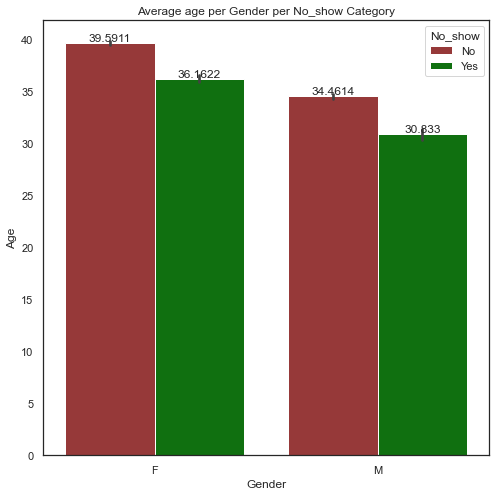

In [336]:
plt.figure(figsize = (8,8))

chartbar = sns.barplot(data=df_16, x='Gender',palette=['brown', 'green'],hue='No_show', y='Age')
chartbar.set(title = 'Average age per Gender per No_show Category')

# function will add data labels to the visual
for bar in chartbar.containers:
    chartbar.bar_label(bar)


The average age of Female patients who attended their appointments is 39.5yrs while the average age for Female patients who skipped their appointments is 36yrs. <br>
The average age of Male patients who attended their appointments is 34yrs while the average age for male patients who skipped their appointments is 30yrs.

### Research Question 5. Do medical appointment attendance rates improve as patients grow older?

In [218]:
#flter data frame to pick appointment attendees only
#Select the Age column only from the dataFrame
#use describe method to return descrption of the values
df_16[df_16['No_show']=='No']['Age'].describe()

count    88208.000000
mean        37.790064
std         23.338878
min         -1.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

When we examine the results of the previous operation we can see that we have a negative value for the min value. This is a probably a data entry error because age of people are generally more than 0.  <br>

Let's proceed with deleting the row with the negative entry

In [219]:
df_16.drop(df_16.index[df_16['Age'] < 0],inplace=True)

we confirm the deletion of the negative value by filtering the dataframe to pick rows where age is less than 0

In [220]:
df_16[df_16['Age'] < 0]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,ScheduledDayTime


the filter operation did not return any rows, so we are clear to proceed 

In [221]:
#RE-RUN describe to get new age percentiles for attendees
df_16[df_16['No_show']=='No']['Age'].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

We are going to use the data descrptions retrieved above to create bins that will be used to categorize the age column.

In [222]:
#create a list of the various descriptions
bins = [df_16[df_16['No_show']=='No']['Age'].describe()['min'],df_16[df_16['No_show']=='No']['Age'].describe()['25%'],df_16[df_16['No_show']=='No']['Age'].describe()['50%'],df_16[df_16['No_show']=='No']['Age'].describe()['75%'],df_16[df_16['No_show']=='No']['Age'].describe()['max']]


Name the bins accordingly 

In [224]:
#create a list to hold the names
bin_names = ['young', 'middle_aged', 'old', 'very_old']

Then add a new column called "age_groups" to the dataframe. It will contain the various age_groups

In [226]:
#add a new column age_groups to the df_16
df_16['age_groups'] = pd.cut(df_16['Age'], bins, labels=bin_names)

Confirm the creation of the new column in the data Frame

In [227]:
#.columns method returns the column headers/labels of the dataframe
'age_groups' in df_16.columns

True

Let's find the number of patients in each age_group who attended their appointments

In [235]:
age_group_counts = df_16[df_16['No_show']=='No'].groupby('age_groups')['AppointmentID'].count()

In [236]:
age_group_counts

age_groups
young          19619
middle_aged    22145
old            21714
very_old       21829
Name: AppointmentID, dtype: int64

Plot the age_group values

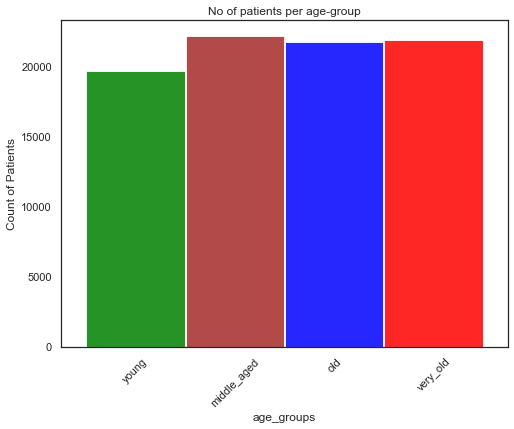

In [342]:
# Find the appointment count for each age_group
age_group_counts.plot.bar(x='age_groups', color=['green', 'brown', 'blue','red'],figsize=(8,6),title='No of patients per age-group',width=0.99, alpha=0.85,ylabel='Count of Patients', rot=45);

As we can see from the bar chart, medical appointment attendance rates do not improve as patients grow older. The cohort with the highest attendance rate is the middle_aged , followed by the very_old, then the old and lastly the young cohort.  

<a id='conclusions'></a>
## Conclusions


> We found that Gender distribution of the appointments stood as follows; Female:64% , Male:35%. These percentages represent the percentage distribution of the genders indicated on the appointments. It is important to note that it doesnt take into account the fact that a single patient may have requested more than one appointment in the period covered by the dataset.  

> On examining the Gender of distinct patients who showed up to atleast once to their appointments the  figures indicated that figures mirrored the gender distribution percentages in the overall dataset. 64% of patients who turned up for their appointments were female while 35% of the Show-ups were male.

> Patients with Hypertension have a higher appointment attendance rate of 83% when compared to patients without hypertension whose appointment attendance rate stands at 79%

> The average age of Female patients who showed up is 36yrs and 39years for those who chose to ignore their checkup.On the other hand, the average age of men who showed up for appointment was 30years while the avergare was 34years for men who skipped their appoinments.
        
> Medical appointment attendance rates do not improve as patients grow older. The attendance rates peak at the second cohort of patients that lies between 18-38yrs and then proceeds to slump in the following cohorts.The cohort with the oldest patients of ages between 56-115yrs has the appointment attendance count. 

### Limitations
1. The presence of outliers in the dataset for instance in the age column may distort some statistical methods such as mean or skew the distribution thereby causing bias. In the age column, we had a (-1)negative entry and several figures that are more than 100.  
2. The dataset contains a limited set of metrics that would not be sufficient to onclusively determine health-care utilization/medical appointment attendance. There are several economic, social and environmental factors that influence the consumption of healthcare such as quality of service delivery, availability of cheaper alternate sources of healthcare,prevalance of traditional myths, severity of the ailment, distance to healthcare centers and disability among many others ("Factors that affect health-care utilization - health-care utilization as a proxy in disability determination - NCBI bookshelf," 2018 p.2). 


### References

How to add data labels to Seaborn barplot? (n.d.). Stack Overflow. [https://stackoverflow.com/questions/62002434/how-to-add-data-labels-to-seaborn-barplot](https://stackoverflow.com/questions/62002434/how-to-add-data-labels-to-seaborn-barplot)

Implications, conclusions and recommendations. (n.d.). University of Guelph - Improve Life. [https://www.uoguelph.ca/hftm/book/export/html/2077](https://www.uoguelph.ca/hftm/book/export/html/2077)

Factors that affect health-care utilization - health-care utilization as a proxy in disability determination - NCBI bookshelf. (2018, March 1). National Center for Biotechnology Information. [https://www.ncbi.nlm.nih.gov/books/NBK500097/](https://www.ncbi.nlm.nih.gov/books/NBK500097/)

How to delete row in pandas dataframe based on condition if string is found in cell value of type list? (n.d.). Stack Overflow. [https://stackoverflow.com/questions/71903471/how-to-delete-row-in-pandas-dataframe-based-on-condition-if-string-is-found-in-c](https://stackoverflow.com/questions/71903471/how-to-delete-row-in-pandas-dataframe-based-on-condition-if-string-is-found-in-c)

Markdown cheat sheet. (n.d.). Markdown Guide. (https://www.markdownguide.org/cheat-sheet/)[https://www.markdownguide.org/cheat-sheet/]

Pandas - Group by multiple columns and get count of 1 of the columns. (n.d.). Stack Overflow. (https://stackoverflow.com/questions/70670982/pandas-group-by-multiple-columns-and-get-count-of-1-of-the-columns)[https://stackoverflow.com/questions/70670982/pandas-group-by-multiple-columns-and-get-count-of-1-of-the-columns]

Pandas.DataFrame.plot — pandas 1.4.2 documentation. (n.d.). pandas - Python Data Analysis Library. (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html]

Pandas.to_datetime — pandas 1.4.3 documentation. (n.d.). pandas - Python Data Analysis Library. (https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)[https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html]

Zach. (2021, August 5). How to add a title to Seaborn plots (With examples). Statology. [https://www.statology.org/seaborn-title/](https://www.statology.org/seaborn-title/)


